In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-amazon/test_amazon.csv


In [2]:
!pip install -U git+https://github.com/huggingface/transformers


  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-z81kv2h_
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-z81kv2h_
  Resolved https://github.com/huggingface/transformers to commit 8bd2b1e8c23234cd607ca8d63f53c1edfea27462
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.45.0.dev0-py3-none-any.whl size=9732510 sha256=1fab025b978e5bd388d06def83eecabfa3c519f577e5af9424402977b60cf9b1
  Stored in directory: /tmp/pip-ephem-wheel-cache-vloq0gm9/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.0
    Uninstalling transformers-4.44.0:
      Successfully uninstalled transformers-4.44.0


In [3]:
!pip install qwen-vl-utils

In [4]:
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 11.8 MB/s eta 0:00:0000:0100:01


In [5]:
!pip install accelerate

In [6]:
!pip install optimum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.7/453.7 kB 9.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 77.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.45.0.dev0
    Uninstalling transformers-4.45.0.dev0:
      Successfully uninstalled transformers-4.45.0.dev0


In [7]:
!pip install auto-gptq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 20.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 81.3 MB/s eta 0:00:00:00:0100:01


In [8]:
!pip install sentencepiece

In [9]:
pip install -U git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-gryvyjbs
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-gryvyjbs
  Resolved https://github.com/huggingface/transformers to commit 8bd2b1e8c23234cd607ca8d63f53c1edfea27462
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.45.0.dev0-py3-none-any.whl size=9732510 sha256=e49c5293f0dc0a7a455627ede530ffb3d1eb718a747a9fae6a2ff020ab95d11d
  Stored in directory: /tmp/pip-ephem-wheel-cache-lvwo715_/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2
ERROR: pip's dependency resolver does no

In [10]:
# pip install flash-attn


In [11]:
# pip install -U git+https://github.com/Dao-AILab/flash-attention.git


In [12]:
import pandas as pd
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info
import torch
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Load the model and processor
model_name = "Qwen/Qwen2-VL-7B-Instruct-GPTQ-Int4"
model = Qwen2VLForConditionalGeneration.from_pretrained(model_name, 
   torch_dtype=torch.bfloat16, device_map="auto")
min_pixels = 256*28*28
max_pixels = 1280*28*28
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct-GPTQ-Int4", min_pixels=min_pixels, max_pixels=max_pixels)

# Define the units as per constants.py
entity_unit_map = {
    'width': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
    'depth': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
    'height': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
    'item_weight': {'gram', 'kilogram', 'microgram', 'milligram', 'ounce', 'pound', 'ton'},
    'maximum_weight_recommendation': {'gram', 'kilogram', 'microgram', 'milligram', 'ounce', 'pound', 'ton'},
    'voltage': {'kilovolt', 'millivolt', 'volt'},
    'wattage': {'kilowatt', 'watt'},
    'item_volume': {'centilitre', 'cubic foot', 'cubic inch', 'cup', 'decilitre', 'fluid ounce', 'gallon', 'imperial gallon', 'litre', 'microlitre', 'millilitre', 'pint', 'quart'}
}

# Load the test.csv file
test_data = pd.read_csv("/kaggle/input/test-amazon/test_amazon.csv")





config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

Unrecognized keys in `rope_scaling` for 'rope_type'='default': {'mrope_section'}


model.safetensors.index.json:   0%|          | 0.00/104k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.94G [00:00<?, ?B/s]

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46
/opt/conda/lib/python3.10/site-packages/transformers/modeling_utils.py:4732: FutureWarning: `_is_quantized_training_enabled` is going to be deprecated in transformers 4.39.0. Please use `model.hf_quantizer.is_trainable` instead
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

6.68 cm


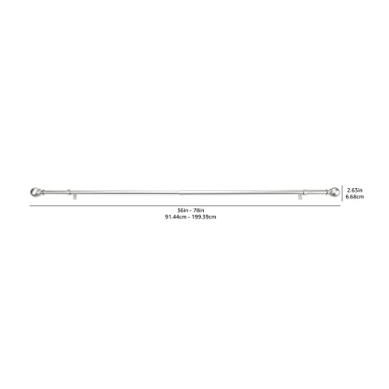

42 centimetre


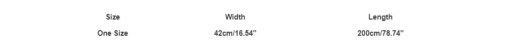

200.0 centimetre


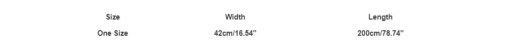

42.0 centimetre


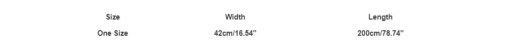

10.50 centimetre


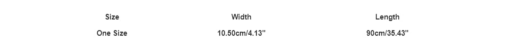

90.0 centimetre


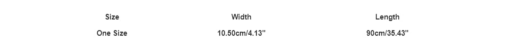

10.50 centimetre


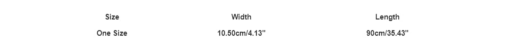

54 inch


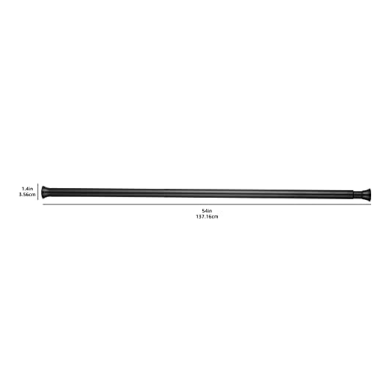

40.0 centimetre


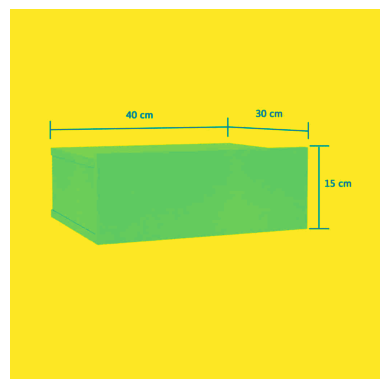

15.0 centimetre


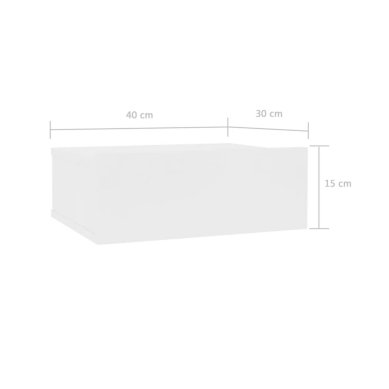

1.0 kilogram


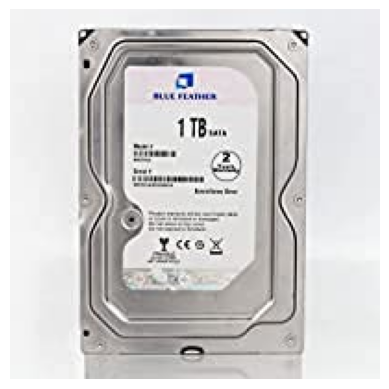

139.5 centimetre


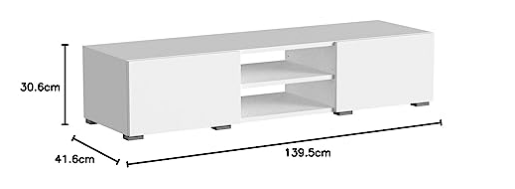

4.3 centimetre


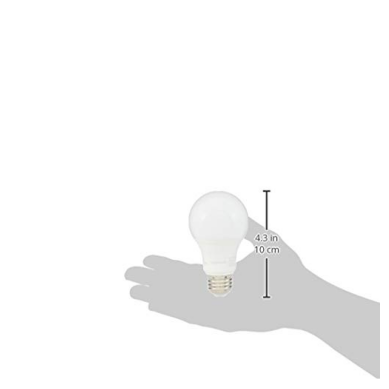

4.3 centimetre


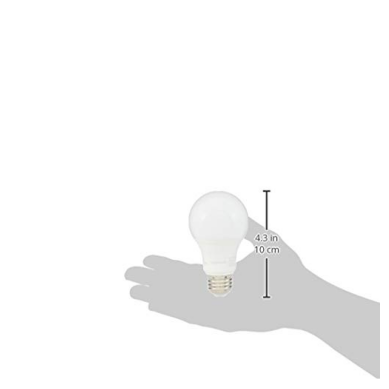

4.3 centimetre


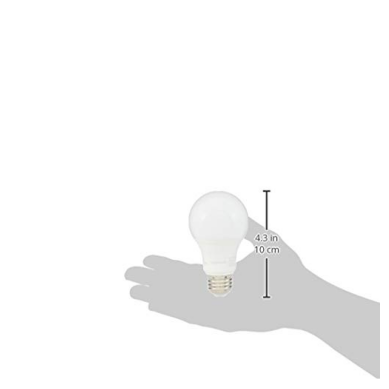

9.0 unit


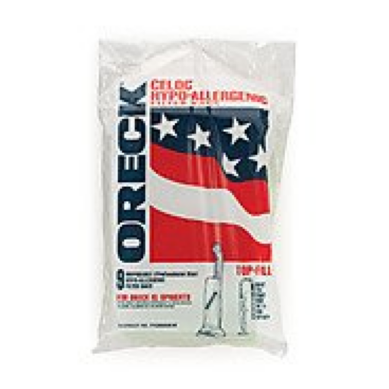

100.0 gram


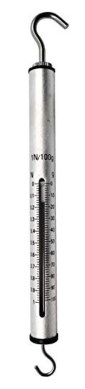

value unit


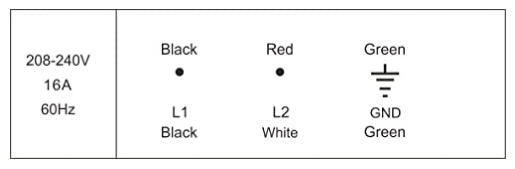

The wattage of the product is not provided in the image.


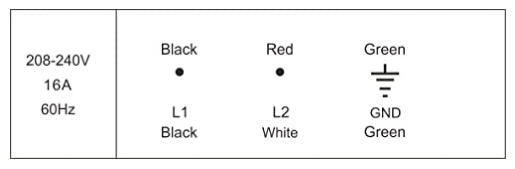

208-240 volt


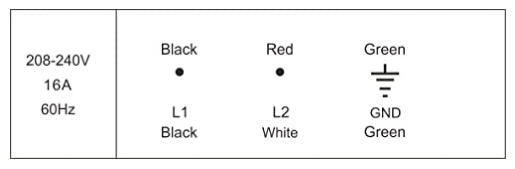

120.0 centimetre


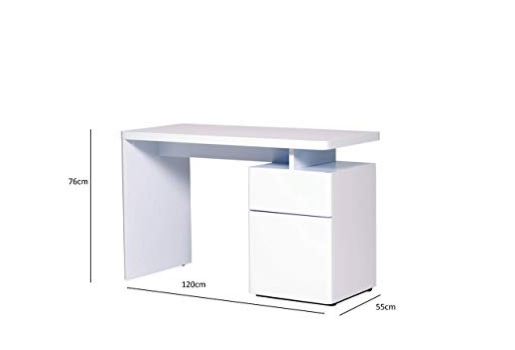

38.0 inch


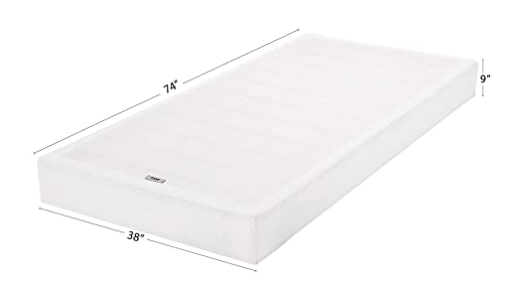

0.5 fluid ounce


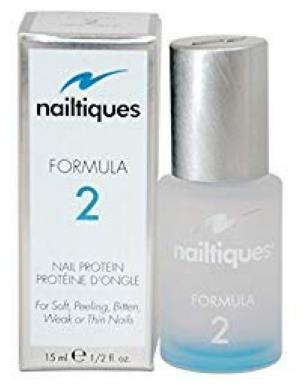

32.0 centimetre


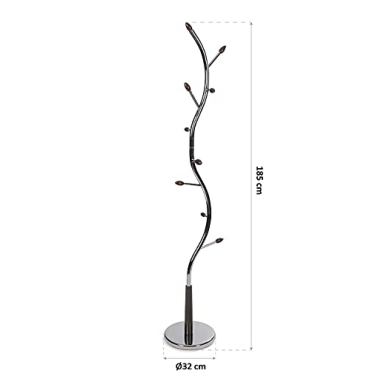

32.0 centimetre


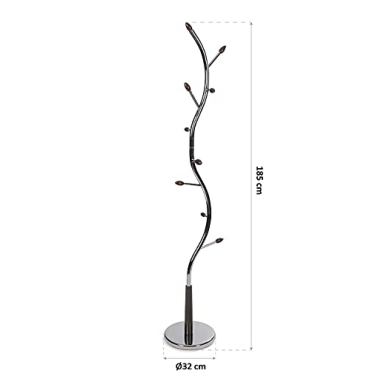

9 centimetre


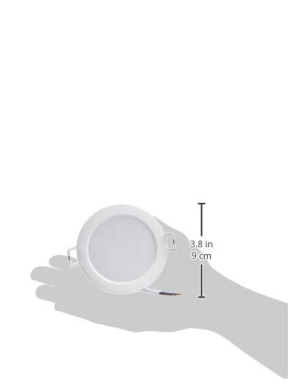

9 centimetre


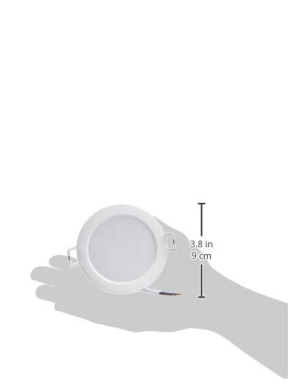

320.0 gram


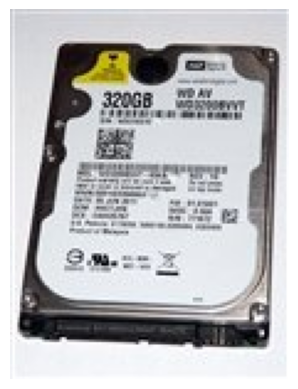

9.5 kilogram


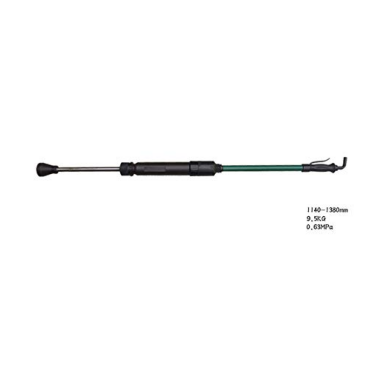

2.62 pound


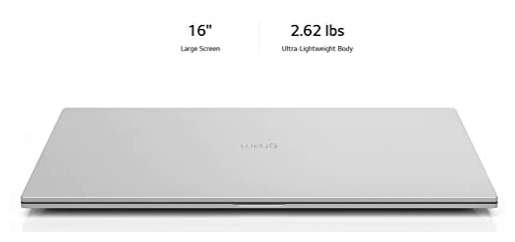

value unit


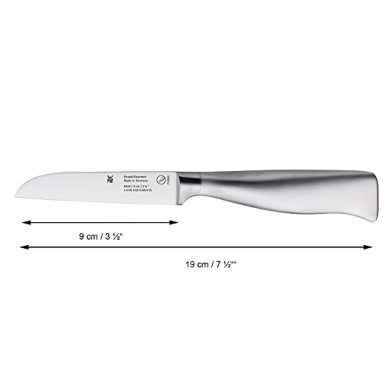

value unit


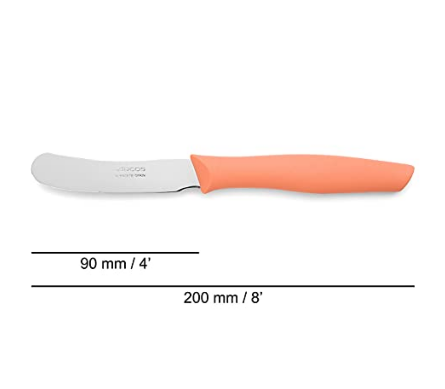

14 centimetre


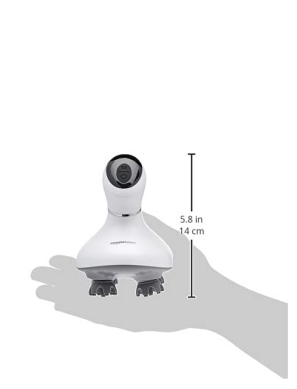

14.0 centimetre


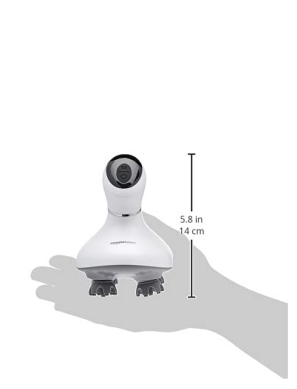

5.8 inch


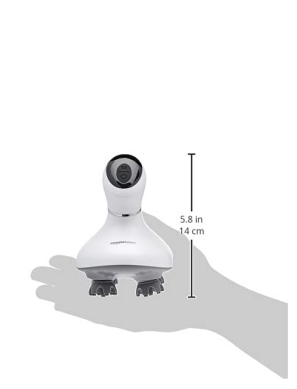

3.0 pound


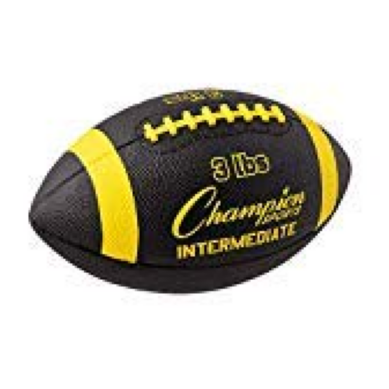

40.5 - 76.5 inch


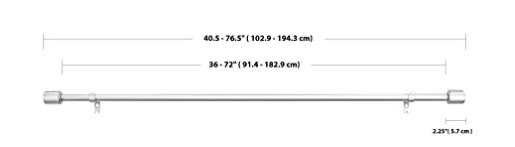

8.0 volt


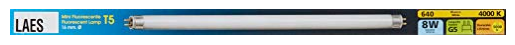

8.0 watt


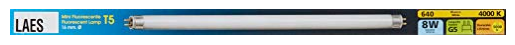

47.2 inch


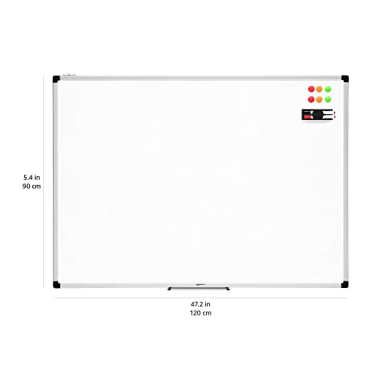

47.2 inch


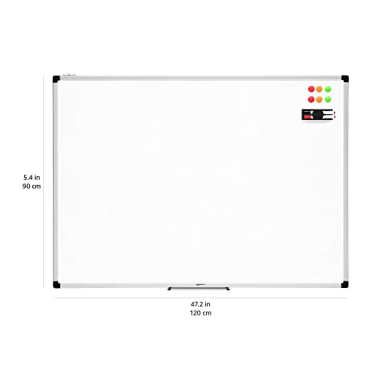

9 inch


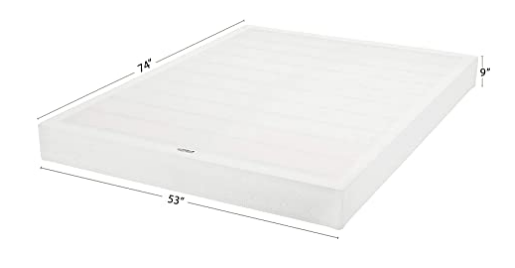

96 inch


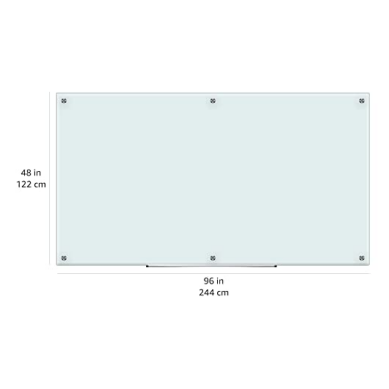

48 inch


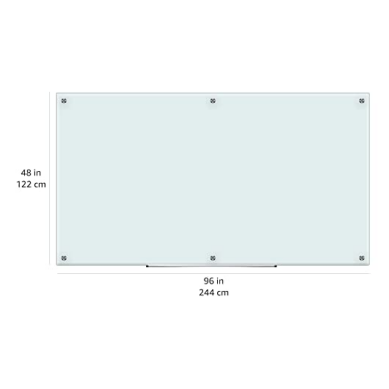

60.0 centimetre


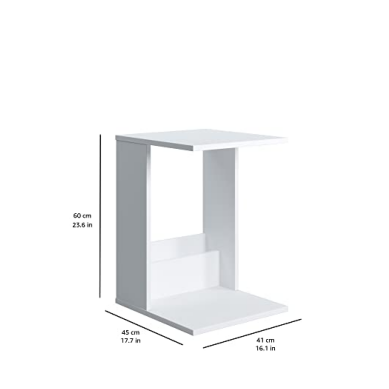

14.0 centimetre


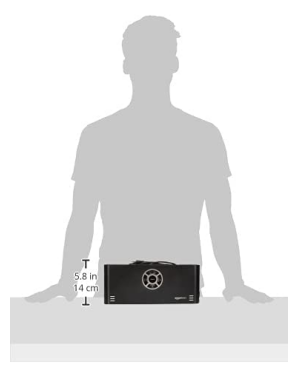

5.8 centimetre


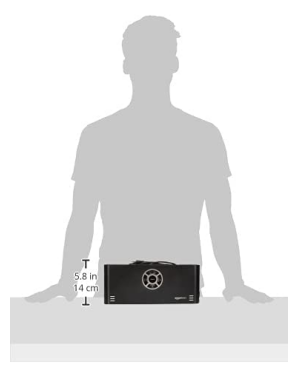

14.0 centimetre


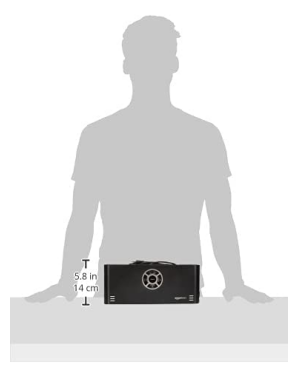

47 inch


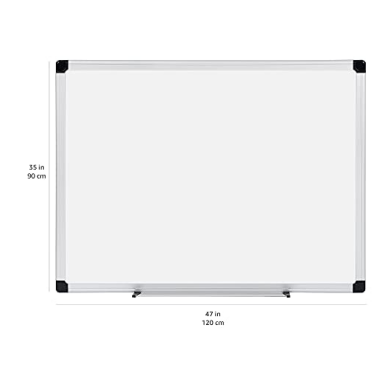

35.0 inch


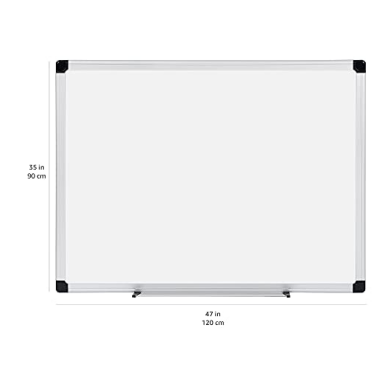

35.0 inch


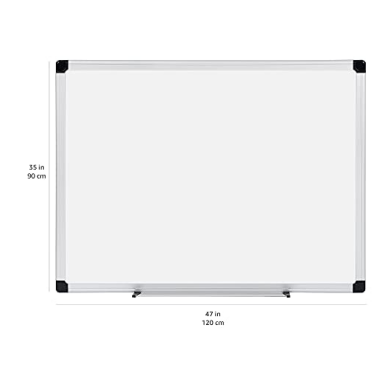

200.0 millimeter


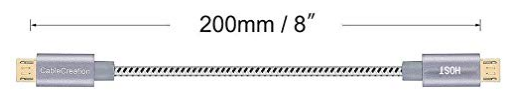

200.0 millimeter


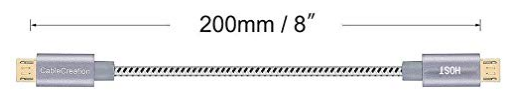

7.56 inch


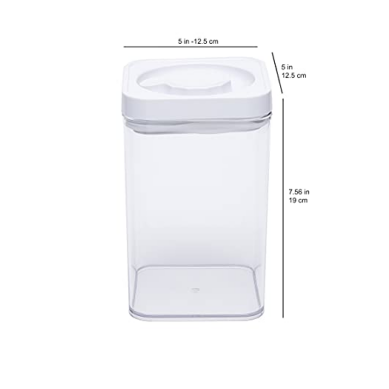

7.56 inch


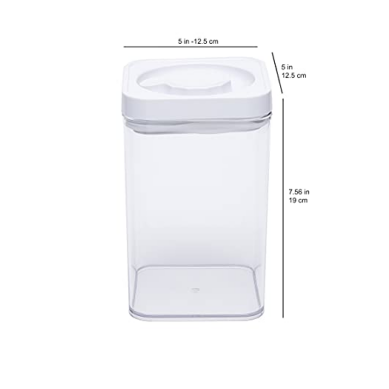

96.52 centimetre


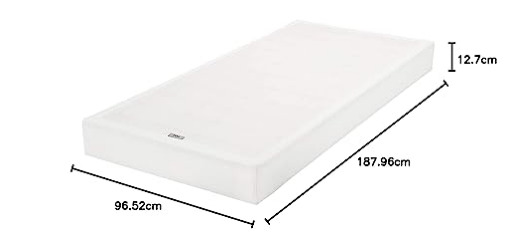

8000 kilogram


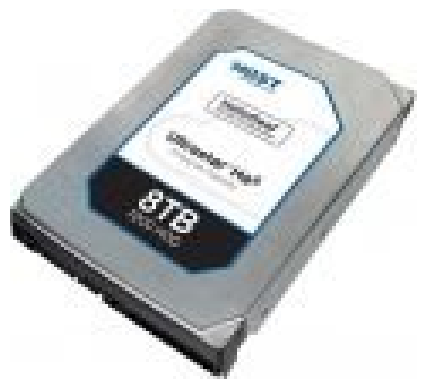

120.0 centimetre


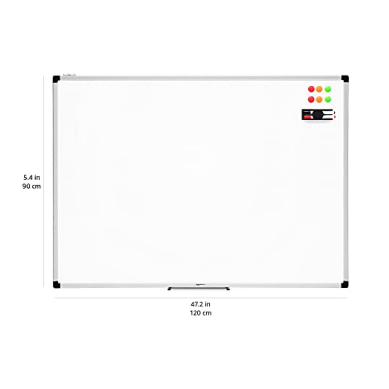

47.2 inch


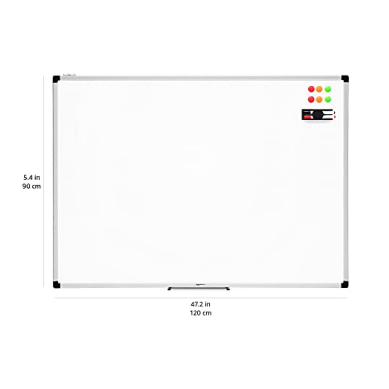

67.5 watt


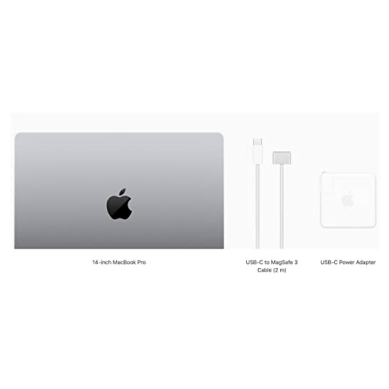

20.0 volt


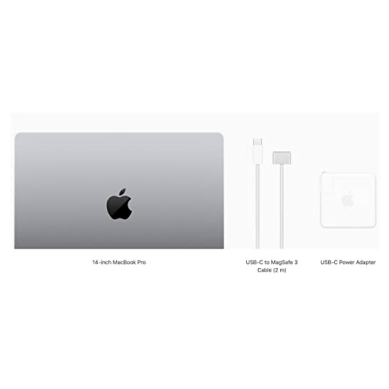

48.0 gram


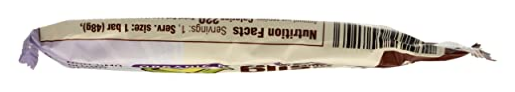

100.0 millimetre


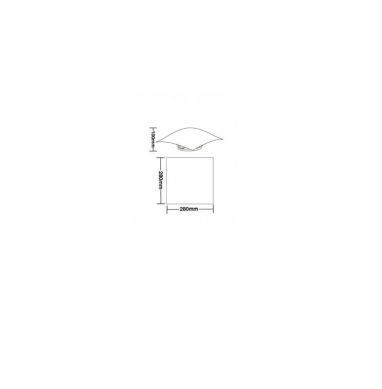

100.0 millimetre


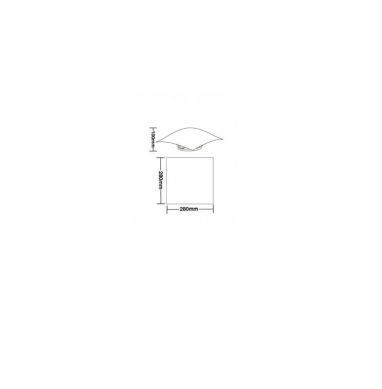

280.0 millimetre


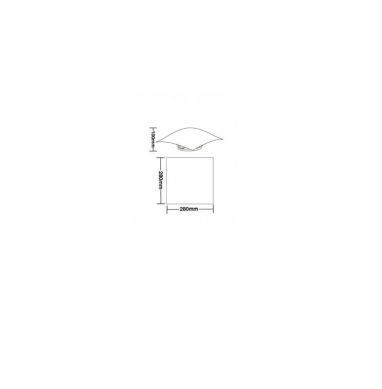

3.7 volt


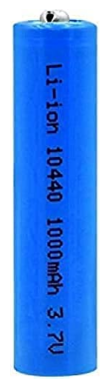

1920.0 kilogram


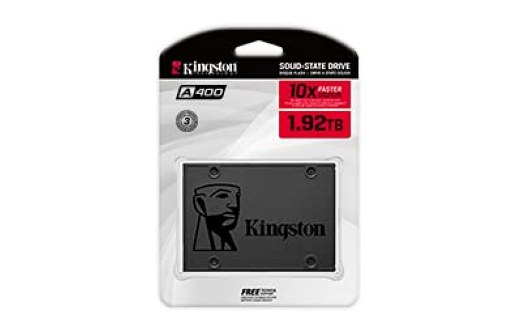

79-151 inch


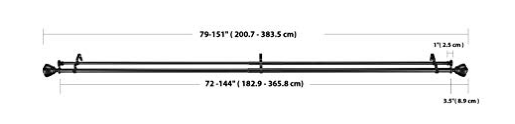

10.0 centimetre


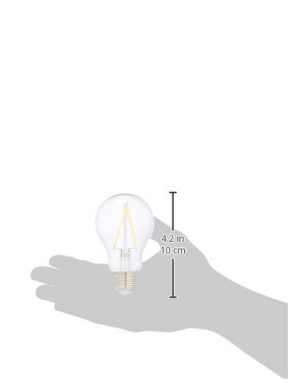

10.0 centimetre


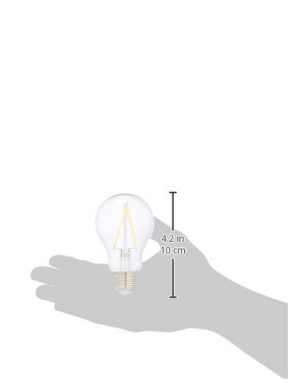

10.0 centimetre


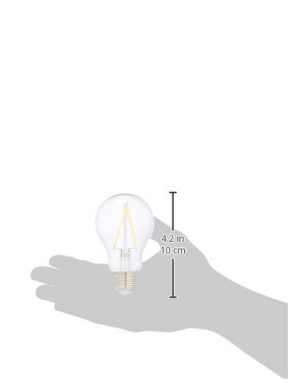

9.1 inch


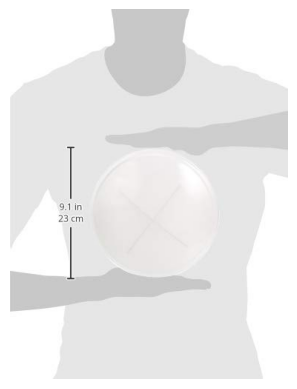

23 centimetre


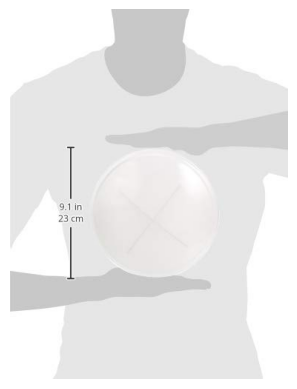

23.0 centimetre


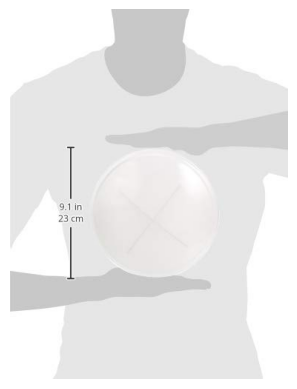

1500.0 watt


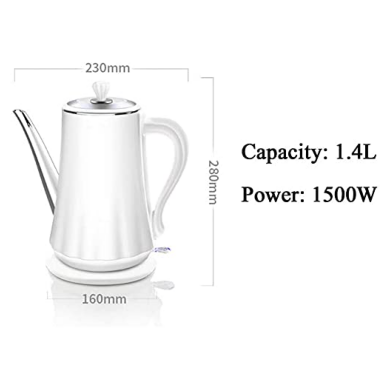

1500.0 watt


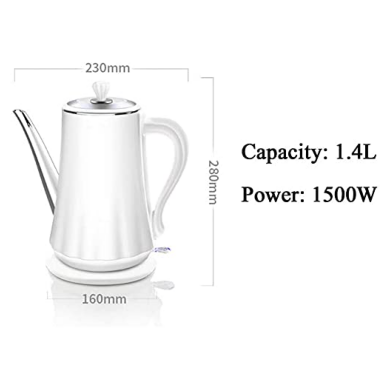

4.7 inch, 12 cm


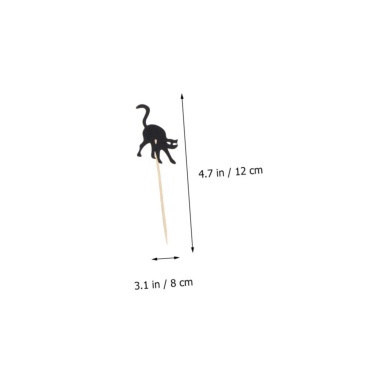

3.1 inch, 8 cm


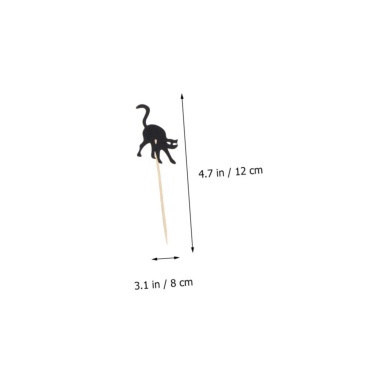

240.0 gram


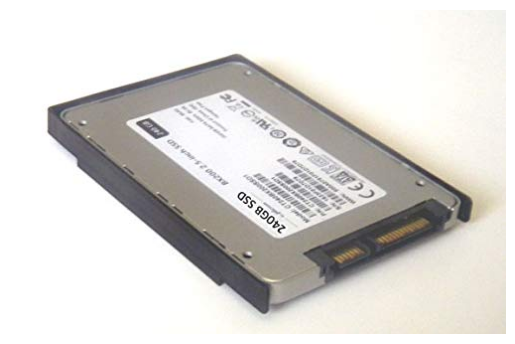

50.0 centimetre


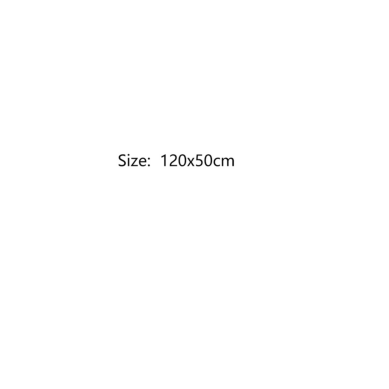

2350.0 gram


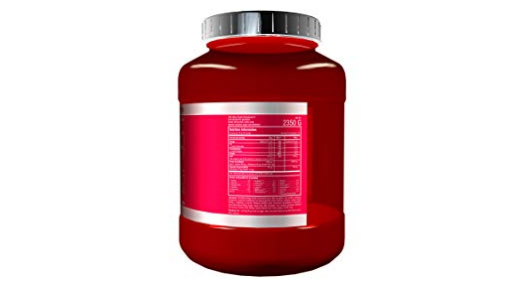

243.0 pound


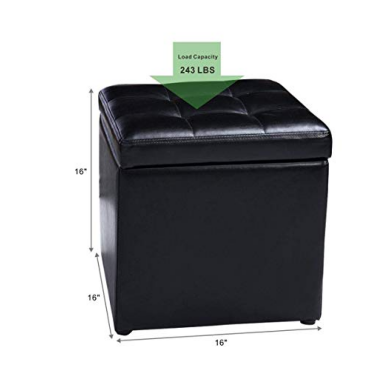

11.1 pound


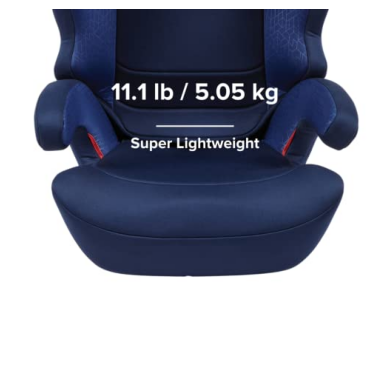

10.0 ounce


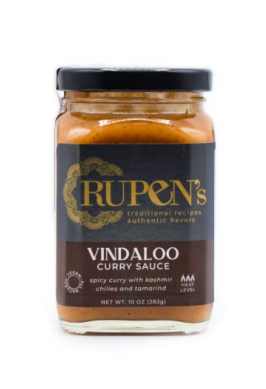

39 inch


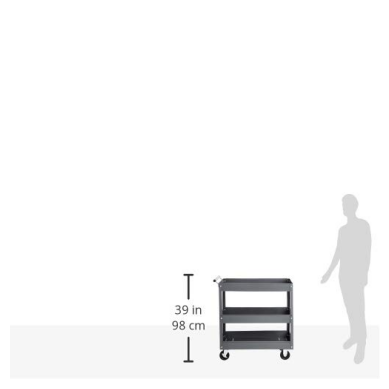

39 inch


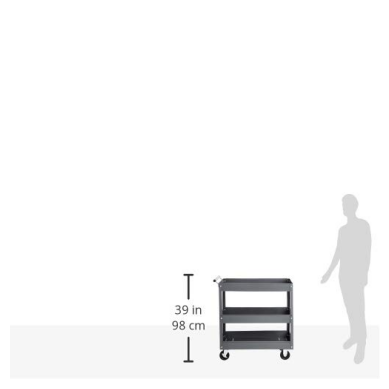

39.0 inch


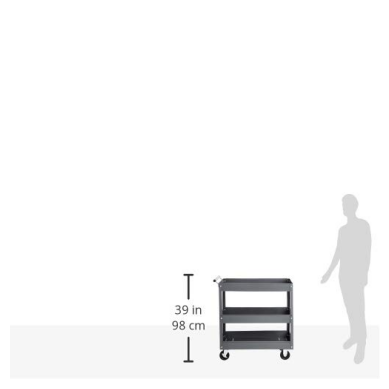

No information provided


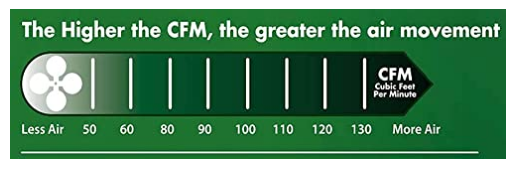

No applicable


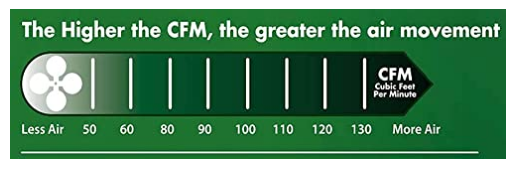

100 CFM


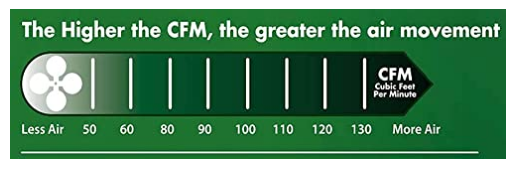

60.0 centimetre


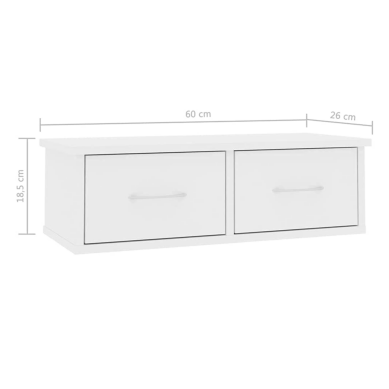

200.0 pound


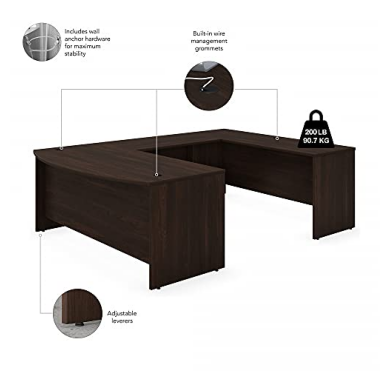

500.0 millimetre


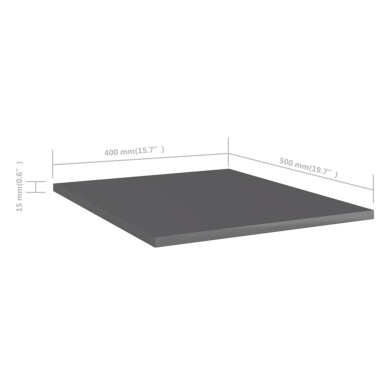

23.95 inch


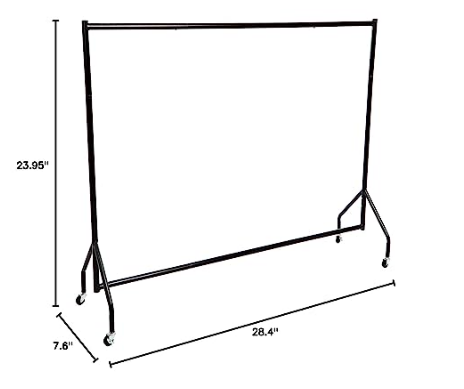

3 pack


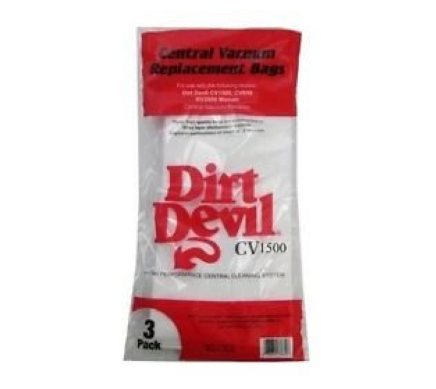

14.0 centimetre


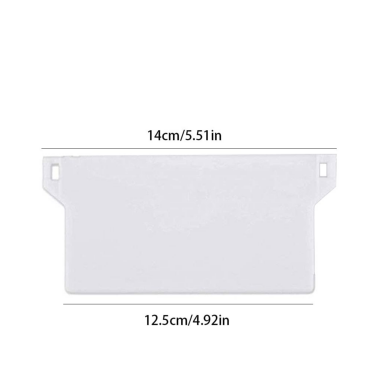

In [ ]:
import requests
# Prepare to store the predictions
predictions = []

# Specify the start and end indices for 100 rows
start_index = 0  # You can change this to where you want to start
end_index = start_index + 100
# Iterate through each row of test data
for idx, row in test_data.iloc[start_index:end_index].iterrows():
    image_url = row['image_link']
    entity_name = row['entity_name']
    
    # Create a message prompt using the entity_name
    messages = [{
        "role": "user",
        "content": [
            {"type": "image", "image": image_url},
            {"type": "text", "text": f"This image shows a product from an e-commerce site. Based on the text and details in the image, please extract the {entity_name} of the product. Provide the answer in the following format: 'value unit'. Only use the following allowed units for {entity_name}: {', '.join(entity_unit_map[entity_name])}. Here are some sample outputs: 500.0 gram, 1.5 metre, 10.5 volt."}
        ],
    }]
    
    # Prepare inputs for the model
    text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    image_inputs, video_inputs = process_vision_info(messages)
    inputs = processor(text=[text], images=image_inputs, videos=video_inputs, padding=True, return_tensors="pt")
    inputs = inputs.to("cuda")
    
    # Generate the output
    generated_ids = model.generate(**inputs, max_new_tokens=28)
    generated_ids_trimmed = [out_ids[len(in_ids):] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)]
    output_text = processor.batch_decode(generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False)
    
    # Post-process to ensure the output is in the allowed units
    predicted_value = output_text[0]
    print(predicted_value)
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    allowed_units = entity_unit_map.get(entity_name, set())
    
    # Split the prediction into value and unit and validate the unit
    if any(unit in predicted_value for unit in allowed_units):
        predictions.append({"index": row['index'], "prediction": predicted_value})
    else:
        predictions.append({"index": row['index'], "prediction": ""})

In [ ]:
# Create the submission DataFrame
submission_df = pd.DataFrame(predictions)


In [ ]:

# Save the submission file
submission_df.to_csv("submission.csv", index=False)
print("Submission file generated successfully!")

In [ ]:
# from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
# from qwen_vl_utils import process_vision_info

# # default: Load the model on the available device(s)
# model = Qwen2VLForConditionalGeneration.from_pretrained(
#     "Qwen/Qwen2-VL-7B-Instruct-GPTQ-Int4", torch_dtype="auto", device_map="auto"
# )

# # We recommend enabling flash_attention_2 for better acceleration and memory saving, especially in multi-image and video scenarios.
# # model = Qwen2VLForConditionalGeneration.from_pretrained(
# #     "Qwen/Qwen2-VL-7B-Instruct-GPTQ-Int4",
# #     torch_dtype=torch.bfloat16,
# #     attn_implementation="flash_attention_2",
# #     device_map="auto",
# # )

# # default processer
# # processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct-GPTQ-Int4")

# # The default range for the number of visual tokens per image in the model is 4-16384. You can set min_pixels and max_pixels according to your needs, such as a token count range of 256-1280, to balance speed and memory usage.
# min_pixels = 256*28*28
# max_pixels = 1280*28*28
# processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct-GPTQ-Int4", min_pixels=min_pixels, max_pixels=max_pixels)

# messages = [
#     {
#         "role": "user",
#         "content": [
#             {
#                 "type": "image",
#                 "image": "https://m.media-amazon.com/images/I/71CE2IDHBhL.jpg",
#             },
#             {"type": "text", "text": "Extract only voltage from the image strictly"},
#         ],
#     }
# ]

# # Preparation for inference
# text = processor.apply_chat_template(
#     messages, tokenize=False, add_generation_prompt=True
# )
# image_inputs, video_inputs = process_vision_info(messages)
# inputs = processor(
#     text=[text],
#     images=image_inputs,
#     videos=video_inputs,
#     padding=True,
#     return_tensors="pt",
# )
# inputs = inputs.to("cuda")

# # Inference: Generation of the output
# generated_ids = model.generate(**inputs, max_new_tokens=128)
# generated_ids_trimmed = [
#     out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
# ]
# output_text = processor.batch_decode(
#     generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
# )
# print(output_text)


In [ ]:

# messages = [
#     {
#         "role": "user",
#         "content": [
#             {
#                 "type": "image",
#                 "image": "https://m.media-amazon.com/images/I/71CE2IDHBhL.jpg",
#             },
#             {"type": "text", "text": "Extract only voltage from the image strictly"},
#         ],
#     }
# ]

# # Preparation for inference
# text = processor.apply_chat_template(
#     messages, tokenize=False, add_generation_prompt=True
# )
# image_inputs, video_inputs = process_vision_info(messages)
# inputs = processor(
#     text=[text],
#     images=image_inputs,
#     videos=video_inputs,
#     padding=True,
#     return_tensors="pt",
# )
# inputs = inputs.to("cuda")

# # Inference: Generation of the output
# generated_ids = model.generate(**inputs, max_new_tokens=128)
# generated_ids_trimmed = [
#     out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
# ]
# output_text = processor.batch_decode(
#     generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
# )
# print(output_text)